<a href="https://colab.research.google.com/github/ricky4918/Tensorflow-2.0-Deep-Learning-and-Artificial-Intelligence/blob/main/Convolutional%20Neural%20Network/CNN_For_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix
import itertools
from tensorflow.keras.models import Model

In [2]:
#Load in the data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print('x_train.shape:', x_train.shape)
print('y_train.shape:', y_train.shape)

170508288/170498071 [==============================] - 13s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [3]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [4]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32,(3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64,(3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128,(3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)


In [5]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data = (x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 19s 4ms/step - loss: 1.5020 - accuracy: 0.4545 - val_loss: 1.2481 - val_accuracy: 0.5618
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1623 - accuracy: 0.5867 - val_loss: 1.0807 - val_accuracy: 0.6178
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0066 - accuracy: 0.6439 - val_loss: 0.9975 - val_accuracy: 0.6438
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8743 - accuracy: 0.6912 - val_loss: 0.9256 - val_accuracy: 0.6793
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7788 - accuracy: 0.7251 - val_loss: 0.9757 - val_accuracy: 0.6651
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6858 - accuracy: 0.7573 - val_loss: 0.9283 - val_accuracy: 0.6839
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5962 - accuracy: 0.7884 - val_loss: 0.9134 - val_accuracy

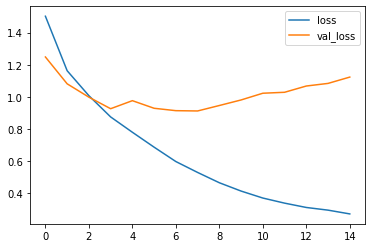

In [6]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

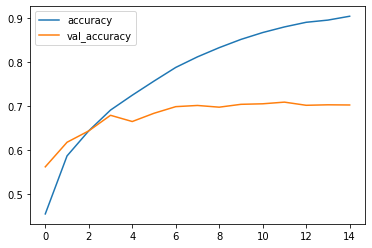

In [7]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

Confusion matrix, wihtout normalization
[[762  21  42  15  33   8  15   4  67  33]
 [ 28 811  13   3   4   3   9   2  23 104]
 [ 61   6 612  57  87  69  54  27  17  10]
 [ 18  13  63 494  86 199  53  32  14  28]
 [ 24   4  85  55 669  36  45  65  11   6]
 [ 12   7  63 184  57 606  24  32   4  11]
 [ 11   7  45  62  39  33 777   6   6  14]
 [ 11   3  40  40  70  66   9 738   5  18]
 [ 62  49  20  20  13  12   8   2 786  28]
 [ 34  91  11  21   6  13   7  12  32 773]]


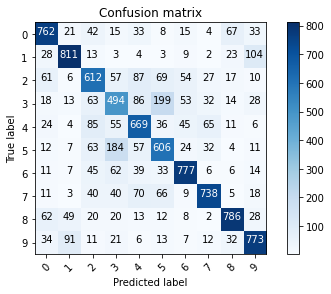

In [8]:
def plot_confusion_matirx(cm, classes, normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:,np.newaxis]
    print("Normalized confusion matrix")

  else:

    print('Confusion matrix, wihtout normalization')

  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt), horizontalalignment = 'center', color = 'white' if cm[i,j]>thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()



p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matirx(cm, list(range(10)))


In [9]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: dog predicted: airplane')

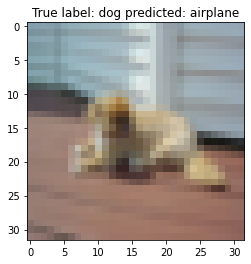

In [11]:
misclassfied_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassfied_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s predicted: %s' %(labels[y_test[i]], labels[p_test[i]]))